# Activation Function

Activation functions helps to determine the output of a neural network. These type of functions are attached to each neuron in the network, and determines whether it should be activated or not, based on whether each neuron’s input is relevant for the model’s prediction. 

> Activation function also helps to normalize the output of each neuron to a range between 1 and 0 or between -1 and 1.


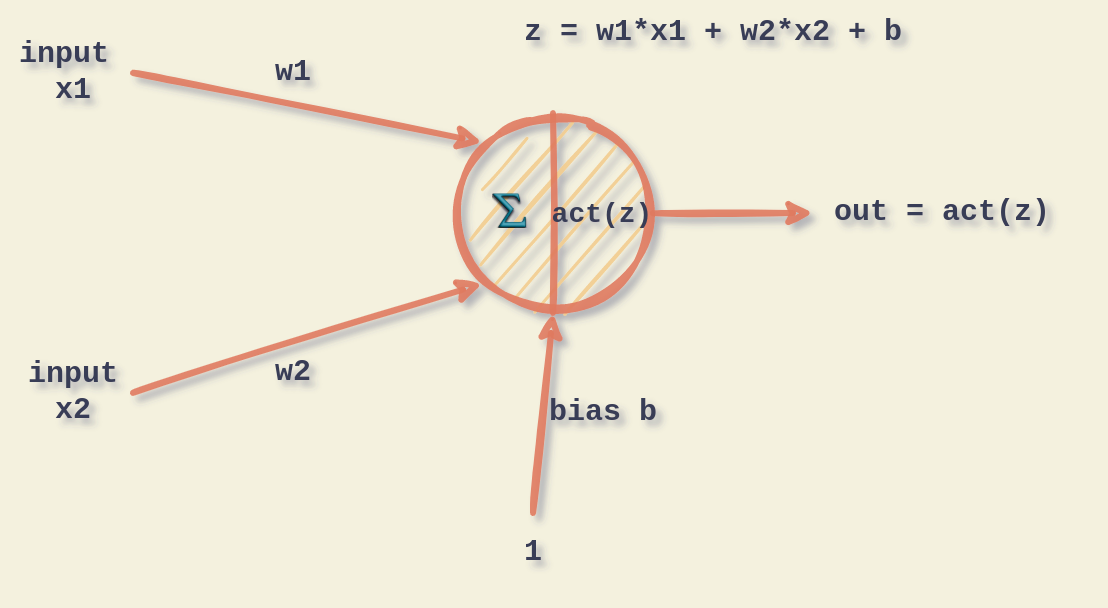

In a neural network, inputs are fed into the neurons in the input layer. Each neuron has a weight, and multiplying the input number with the weight gives the output of the neuron, which is transferred to the next layer.

The activation function is a mathematical “gate” in between the input feeding the current neuron and its output going to the next layer. It can be as simple as a step function that turns the neuron output on and off, depending on a rule or threshold.


> Neural networks use non-linear activation functions, which can help the network learn complex data, compute and learn almost any function representing a question, and provide accurate predictions.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

plt.style.use('fivethirtyeight')

In [5]:
x = np.linspace(-10,10,100)
len(x)

100

In [6]:
def derivative(f,x,delta_x=1e-6):
    return (f(x + delta_x) - f(x)) / (delta_x)

In [7]:
def plot_graph(x, f, ALPHA=0.6, 
               label_x=r"$x \rightarrow$", 
               label_y=r"$act(x), act'(x)$", 
               title=None, 
               LABEL_Y=None, 
               LABEL_Y_DASH=None, 
               filepath_to_plot="plot.png"):
    y = f(x)
    y_dash = derivative(f, x)
    plt.figure(figsize=(10, 8))
    plt.axhline(y=0, color='black', linestyle='--', lw=2)
    plt.axvline(x=0, color='black', linestyle='--', lw=2)
    plt.xlabel(label_x)
    plt.ylabel(label_y)

    if (LABEL_Y is not None) and (LABEL_Y_DASH is not None):
        plt.plot(x, y, alpha=ALPHA, label=LABEL_Y)
        plt.plot(x, y_dash, alpha=ALPHA, label=LABEL_Y_DASH)
        plt.legend(fontsize=14)
    else:
        plt.plot(x, y, alpha=ALPHA)
        plt.plot(x, y_dash, alpha=ALPHA)

    plt.savefig(filepath_to_plot)

In [8]:

root_plot_dir = "plots"
os.makedirs(root_plot_dir, exist_ok=True)

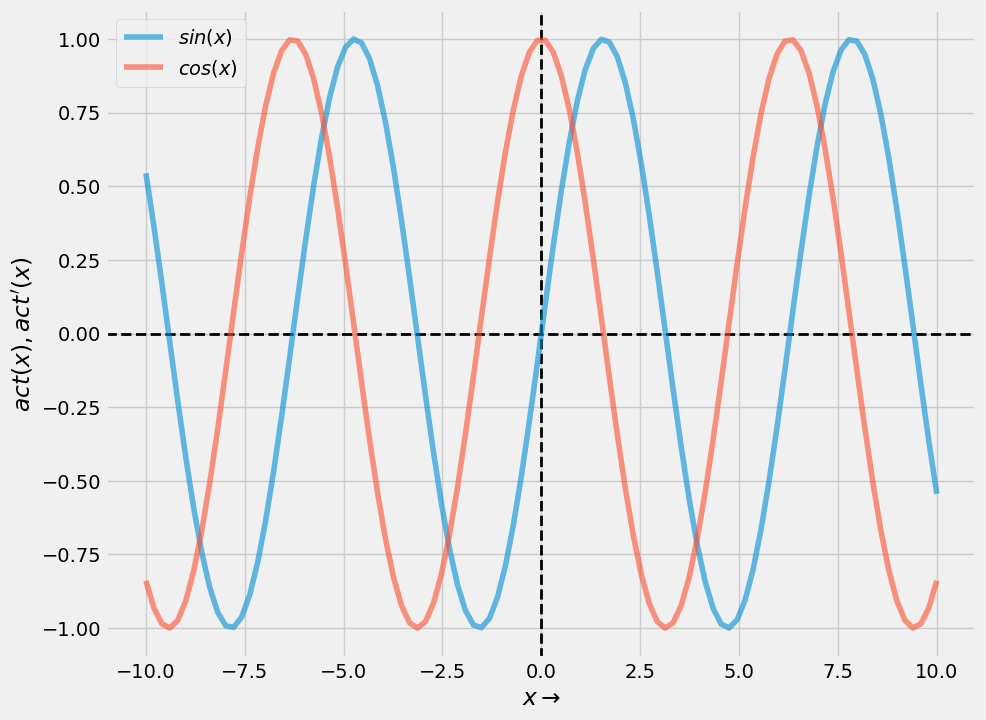

In [9]:
def sine(x):
    return np.sin(x)

def plot_sine(x, path):
    plot_graph(x, f=sine, ALPHA=0.6,
    label_x=r"$x \rightarrow$",
    label_y=r"$act(x), act'(x)$", 
    title="sine function", 
    LABEL_Y=r"$sin(x)$", 
    LABEL_Y_DASH=r"$cos(x)$", 
    filepath_to_plot=path)  

plot_sine(x, os.path.join(root_plot_dir, "sine.png"))

### **Sigmod function**



The function formula and graph are as follows

$$\sigma (x) = \frac{1}{1+e^{-x}}$$

$$where\ \sigma(x) \in (0, 1),\\
and\ x \in (-\infty, +\infty)$$

#### Python implimentaion - 

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

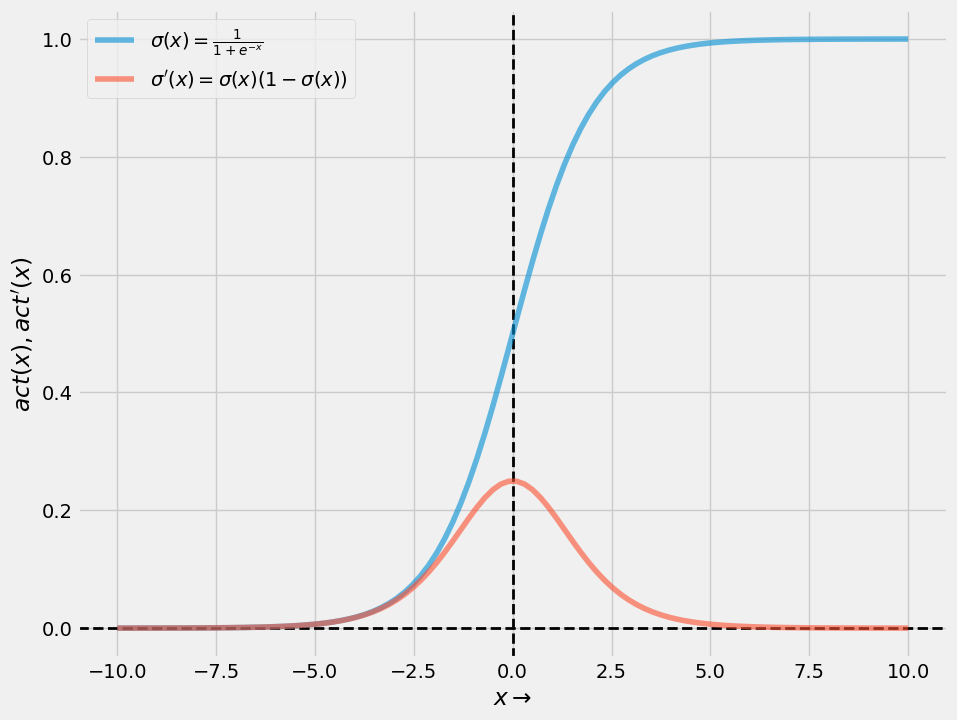

In [11]:
def plot_sigmoid(x, path):
    plot_graph(x, f=sigmoid, title="Sigmoid function", 
            LABEL_Y=r"$\sigma(x) = \frac{1}{1 + e^{-x}}$", 
            LABEL_Y_DASH=r"$\sigma^\prime(x) = \sigma(x)(1-\sigma(x))$", 
            filepath_to_plot=path)

plot_sigmoid(x, os.path.join(root_plot_dir, "sigmoid"))

* The Sigmoid function is the most frequently used activation function in the beginning of deep learning. 

* It is a smoothing function that is easy to derive.

* In the sigmoid function, we can see that its output is in the open interval (0,1). We can think of probability, but in the strict sense, don't treat it as probability. The sigmoid function was more popular once. 

* It can be thought of as the firing rate of a neuron. In the middle where the slope is relatively large, it is the sensitive area of the neuron. On the sides where the slope is very gentle, it is the neuron's inhibitory area.

The function itself has certain defects:-

1. When the input is slightly away from the coordinate origin, the gradient of the function becomes very small, almost zero. In the process of neural network backpropagation, we all use the chain rule of differential to calculate the differential of each weight w. When the backpropagation passes through the sigmod function, the differential on this chain is very small. Moreover, it may pass through many sigmod functions, which will eventually cause the weight w to have little effect on the loss function, which is not conducive to the optimization of the weight. This The problem is called gradient saturation or gradient dispersion.

2. The function output is not centered on 0, which will reduce the efficiency of weight update.

3. The sigmod function performs exponential operations, which is slower for computers.


Advantages of Sigmoid Function : -

1. Smooth gradient, preventing “jumps” in output values.
2. Output values bound between 0 and 1, normalizing the output of each neuron.
3. Clear predictions, i.e very close to 1 or 0.


Sigmoid has three major disadvantages:
* Prone to gradient vanishing
* Function output is not zero-centered
* Power operations are relatively time consuming


### **Hyperbolic tangent activation function**

The tanh function formula and curve are as follows

$$tanh(x) = \frac{(e^{x} - e^{-x})}{(e^{x} + e^{-x})}$$

$$where\ \tanh(x) \in (-1, 1),\\
and\ x \in (-\infty, +\infty)$$

#### Python implimentaion - 

In [12]:
def tanh(x):
    return np.tanh(x)

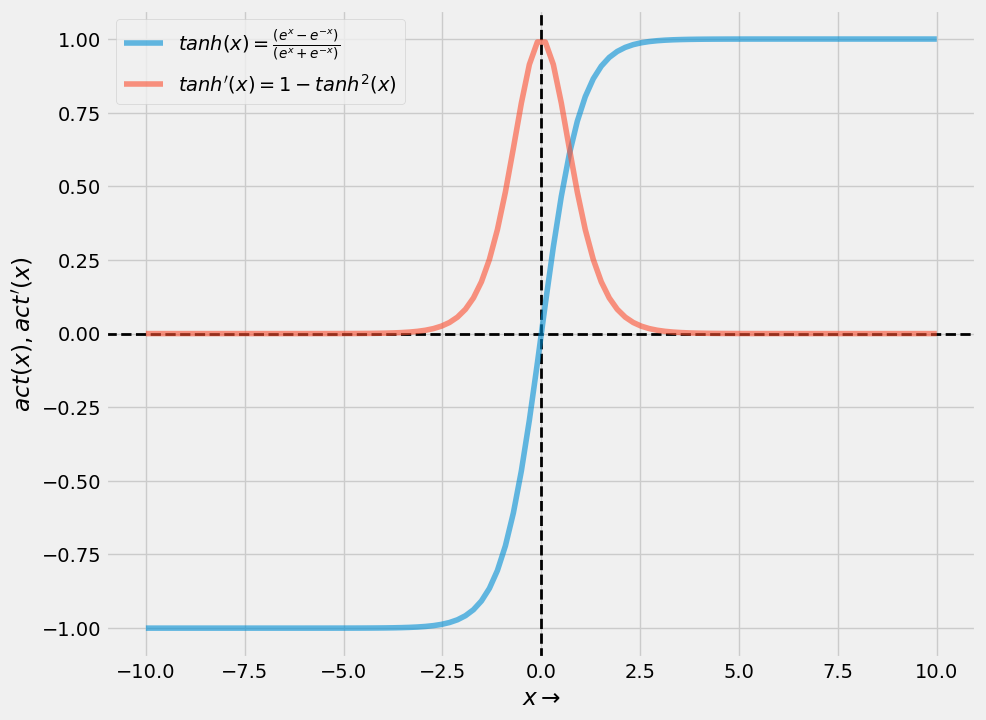

In [13]:
def plot_tanh(x, path):
    plot_graph(x, f=tanh, title="Hyperbolic Tangent", 
            LABEL_Y=r"$tanh(x) = \frac{(e^{x} - e^{-x})}{(e^{x} + e^{-x})}$", 
            LABEL_Y_DASH=r"$tanh^\prime(x) = 1 - tanh^2(x)$", 
            filepath_to_plot=path)

plot_tanh(x, os.path.join(root_plot_dir, "tanh"))

Tanh is a hyperbolic tangent function. The curves of tanh function and sigmod function are relatively similar. Let ’s compare them. First of all, when the input is large or small, the output is almost smooth and the gradient is small, which is not conducive to weight update. The difference is the output interval. 

The output interval of tanh is (-1, 1), and the whole function is 0-centric, which is better than sigmod.

In general binary classification problems, the tanh function is used for the hidden layer and the sigmod function is used for the output layer. However, these are not static, and the specific activation function to be used must be analyzed according to the specific problem, or it depends on debugging.

### **Rectified linear unit activation function(ReLU)**

ReLU function formula and curve are as follows


$$ReLU(x)= max(x,0)$$

$$where\ ReLU(x) \in (0, x),\\
and\ x \in [-\infty, +\infty]$$

#### Python implimentation - 



In [14]:
def relu(x):
    return np.where(x>=0, x, 0)

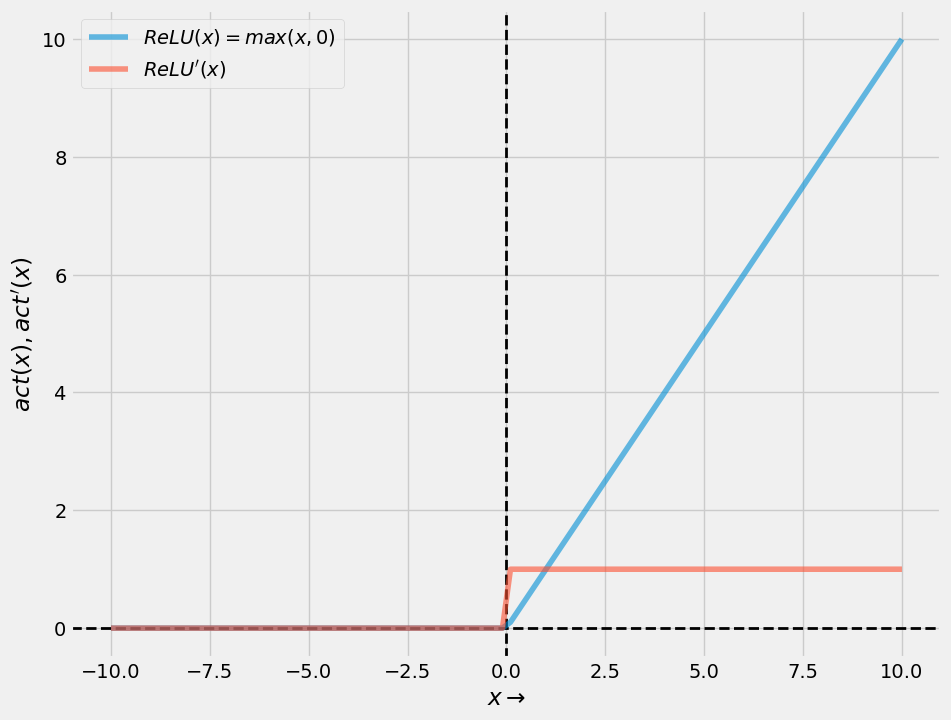

In [15]:
def plot_relu(x, path):
    plot_graph(x, f=relu, title="ReLU", 
            LABEL_Y=r"$ReLU(x)= max(x,0)$", 
            LABEL_Y_DASH=r"$ReLU^\prime(x)$", 
            filepath_to_plot=path)
plot_relu(x, os.path.join(root_plot_dir, "ReLU"))

The ReLU function is actually a function that takes the maximum value. Note that this is not fully interval-derivable, but we can take sub-gradient, as shown in the figure above. Although ReLU is simple, it is an important achievement in recent years.

The ReLU (Rectified Linear Unit) function is an activation function that is currently more popular. Compared with the sigmod function and the tanh function, it has the following advantages:

1. When the input is positive, there is no gradient saturation problem.

2. The calculation speed is much faster. The ReLU function has only a linear relationship (before and after 0 i.e. conditionally linear or piece wise linear). Whether it is forward or backward, it is much faster than sigmod and tanh. (Sigmod and tanh need to calculate the exponent, which will be slower.)

Ofcourse, there are disadvantages:

1. When the input is negative, ReLU is completely inactive, which means that once a negative number is entered, ReLU will die. In this way, in the forward propagation process, it is not a problem. Some areas are sensitive and some are insensitive. But in the backpropagation process, if you enter a negative number, the gradient will be completely zero, which has the same problem as the sigmod function and tanh function.

2. We find that the output of the ReLU function is either 0 or a positive number, which means that the ReLU function is not a 0-centric function.

### **Leaky ReLU function**

$$ 
leaky\_relu(x, \alpha) = \left\{\begin{matrix} 
x & x\geq 0 \\ 
\alpha x & x \lt 0 
\end{matrix}\right.
$$

$$where\ x \in [-\infty, +\infty]$$

#### Python implimentation - 

In [16]:
def leaky_relu(x, alpha=0.1):
    return np.where(x>=0,x,alpha*x)

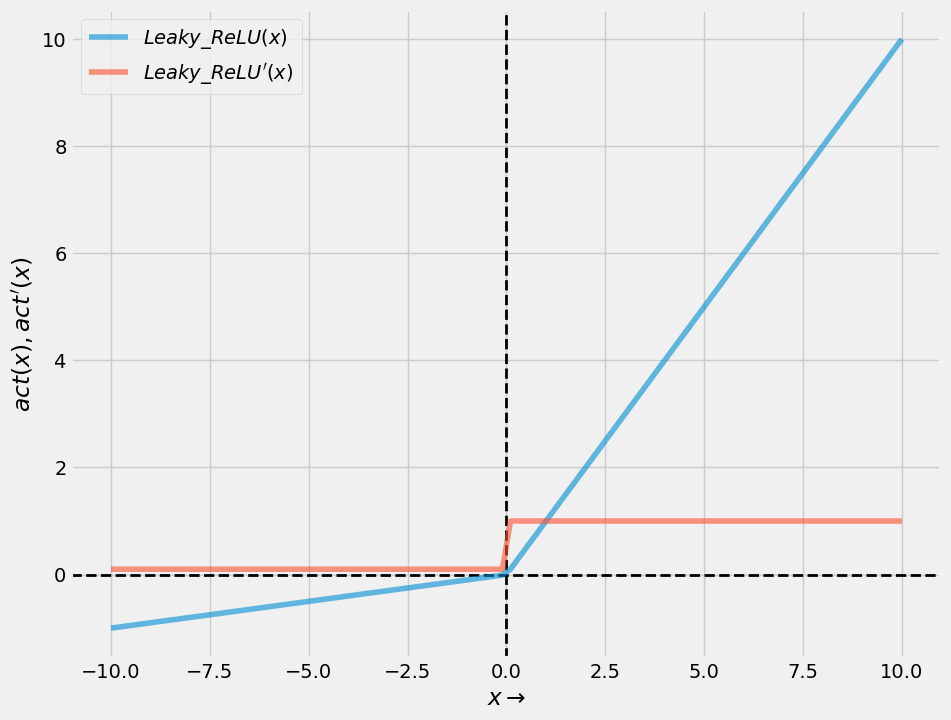

In [17]:
def plot_leaky_relu(x, path):
    plot_graph(x, f=leaky_relu, title="Leaky ReLU", 
            LABEL_Y=r"$Leaky\_ReLU(x)$", 
            LABEL_Y_DASH=r"$Leaky\_ReLU^\prime(x)$", 
            filepath_to_plot=path)

plot_leaky_relu(x, os.path.join(root_plot_dir, "LeakyReLU"))


In order to solve the Dead ReLU Problem, people proposed to set the first half of ReLU 0.01x instead of 0. Another intuitive idea is a parameter-based method, **$Parametric ReLU : f(x)= max(\alpha x,x)$**, WHERE $\alpha$ can be learned from back propagation. In theory, Leaky ReLU has all the advantages of ReLU, plus there will be no problems with Dead ReLU, but in actual operation, it has not been fully proved that Leaky ReLU is always better than ReLU.

### **ELU (Exponential Linear Units) function**

$$elu(x, \alpha) = \left\{\begin{matrix} x & x\geq0\\ \alpha \cdot (e^{x} - 1) & x \lt 0 \end{matrix}\right.$$

$$\alpha\ = scaler\ slope\ of\ negative\ section$$

#### Python implimentation - 

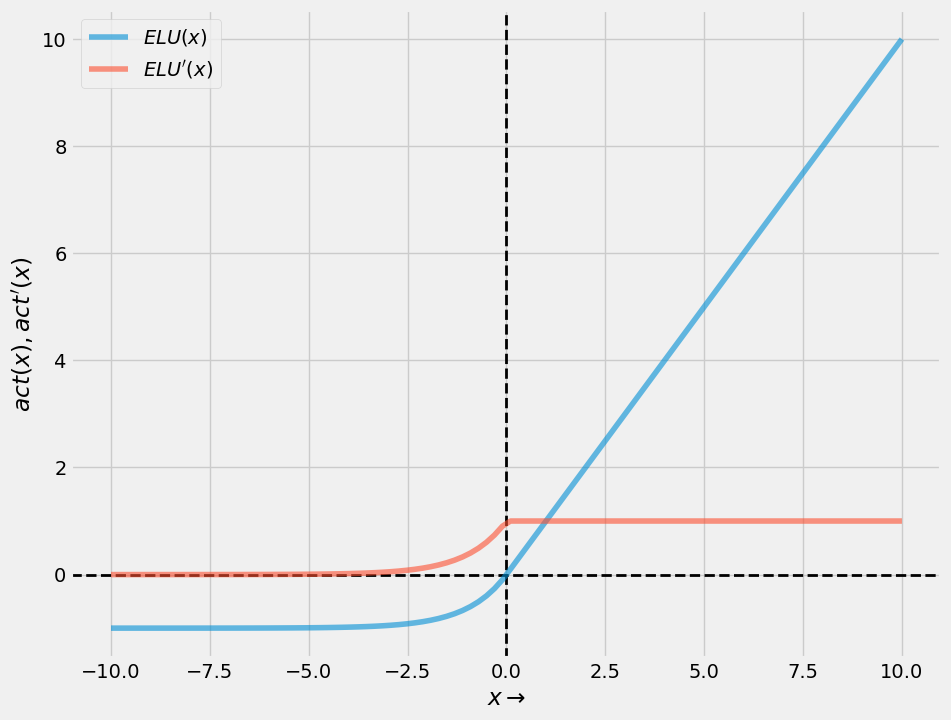

In [18]:
def elu(x, ALPHA=1.0):
    return np.where(x>0, x, (ALPHA * (np.exp(x) - 1)))

def plot_elu(x, path):
    plot_graph(x, f=elu, title="ELU", 
            LABEL_Y=r"$ELU(x)$", 
            LABEL_Y_DASH=r"$ELU^\prime(x)$", 
            filepath_to_plot=path)

plot_elu(x, os.path.join(root_plot_dir, "ELU"))


ELU is also proposed to solve the problems of ReLU. Obviously, ELU has all the advantages of ReLU, and:

* No Dead ReLU issues
* The mean of the output is close to 0, zero-centered

One small problem is that it is slightly more computationally intensive. Similar to Leaky ReLU, although theoretically better than ReLU, there is currently no good evidence in practice that ELU is always better than ReLU.

### SELU:

$scale \times elu(x, \alpha)$


[reference](https://www.tensorflow.org/api_docs/python/tf/keras/activations/selu)

In [20]:
%pip install -q tensorflow

Note: you may need to restart the kernel to use updated packages.


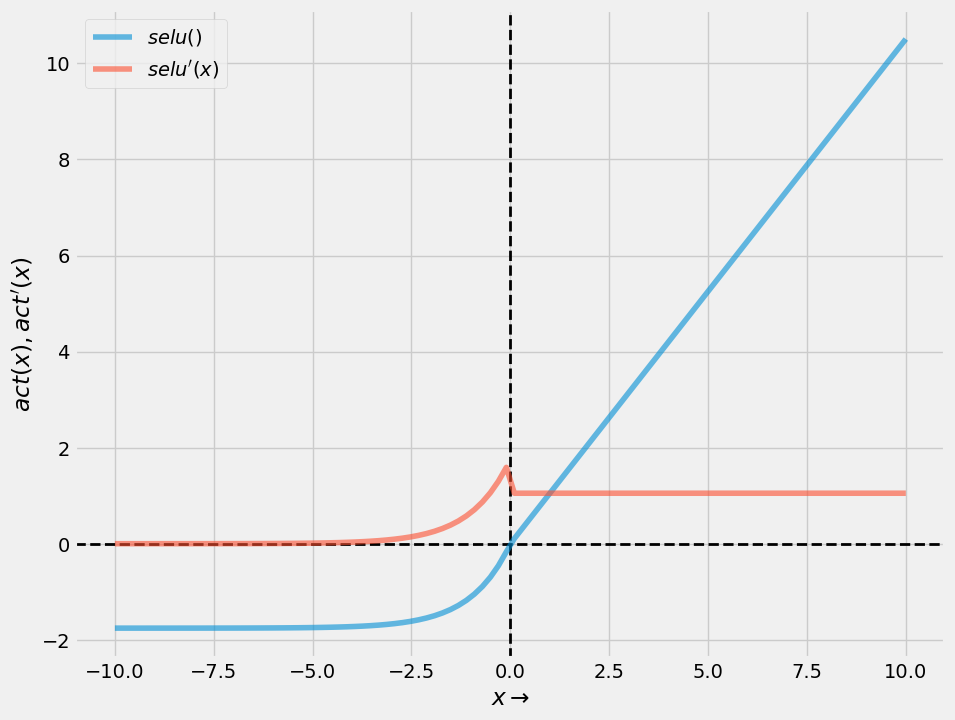

In [21]:
import tensorflow as tf
def selu(x, ALPHA=1.0):
    return tf.keras.activations.selu(x)



def plot_selu(x, path):
    plot_graph(x, f=selu, title="SELU", 
            LABEL_Y=r"$selu()$", 
            LABEL_Y_DASH=r"$selu^\prime(x)$", 
            filepath_to_plot=path)

plot_selu(x, os.path.join(root_plot_dir, "SELU"))

In [22]:
def selu_alt(x, ALPHA=1.67326324, scale=1.05070098):
    return scale * tf.keras.activations.elu(x, alpha=ALPHA)

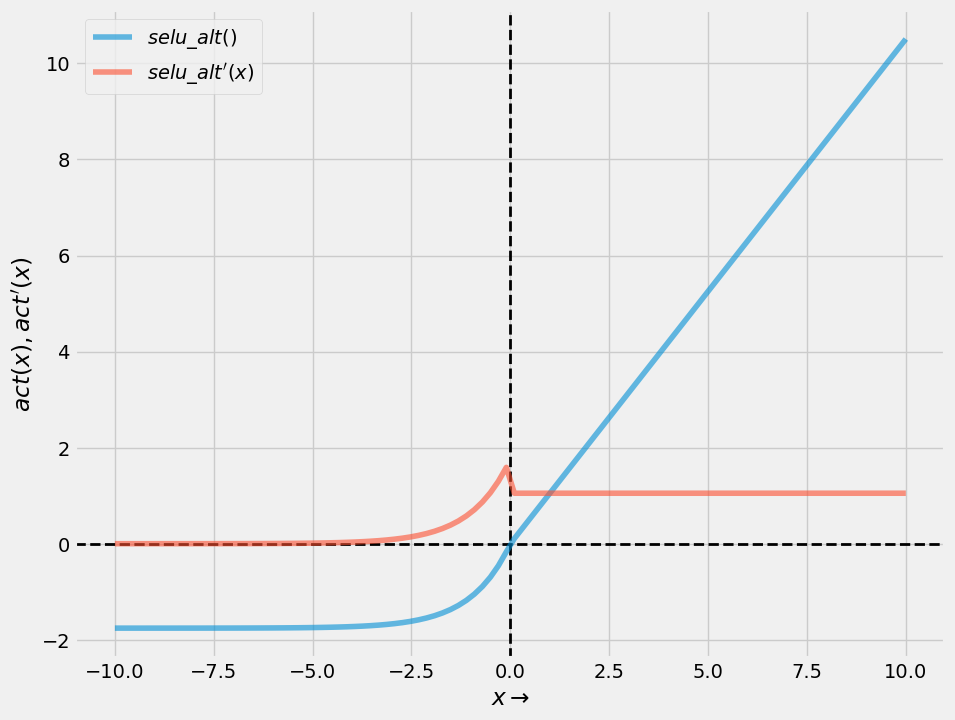

In [23]:
def plot_selu_alt(x, path):
    plot_graph(x, f=selu, title="SELU ALT", 
            LABEL_Y=r"$selu\_alt()$", 
            LABEL_Y_DASH=r"$selu\_alt^\prime(x)$", 
            filepath_to_plot=path)

plot_selu_alt(x, os.path.join(root_plot_dir, "SELU")) 

### **PRelu (Parametric ReLU)**

PReLU is also an improved version of ReLU. In the negative region, PReLU has a small slope, which can also avoid the problem of ReLU death. Compared to ELU, PReLU is a linear operation in the negative region. Although the slope is small, it does not tend to 0, which is a certain advantage.

$$f(y_i) = \left\{\begin{matrix} y_i & y_i>0\\ \alpha_i \cdot y_i & y_i \leq 0 \end{matrix}\right.$$

We look at the formula of PReLU. The parameter α is generally a number between 0 and 1, and it is generally relatively small, such as a few zeros. When α = 0.01, we call PReLU as Leaky Relu , it is regarded as a special case PReLU it.

Above, yᵢ is any input on the ith channel and aᵢ is the negative slope which is a learnable parameter.
* if $\alpha_i=0$, f becomes ReLU
* if $\alpha_i>0$, f becomes leaky ReLU
* if $\alpha_i$ is a learnable parameter, f becomes PReLU

### **Softmax activation function**

$$S(x_j)=\frac{e^{x_j}}{\sum_{k=1}^{K} e^{x_k}}, where\ j = 1,2, \cdots, K $$


for an arbitrary real vector of length K, Softmax can compress it into a real vector of length K with a value in the range (0, 1), and the sum of the elements in the vector is 1. 

It also has many applications in Multiclass Classification and neural networks. Softmax is different from the normal max function: the max function only outputs the largest value, and Softmax ensures that smaller values have a smaller probability and will not be discarded directly. It is a "max" that is "soft".

The denominator of the Softmax function combines all factors of the original output value, which means that the different probabilities obtained by the Softmax function are related to each other.
In the case of binary classification, for Sigmoid, there are:

$$p(y= 1|x) = \frac{1}{1+e^{-\theta^Tx}}$$

$$p(y= 0|x) = 1- p(y= 1|x)  =\frac{e^{-\theta^Tx}}{1+e^{-\theta^Tx}}$$

For Softmax with K = 2, there are:

$$p(y= 1|x) = \frac{e^{\theta_1^Tx}}{e^{\theta_0^Tx} + e^{\theta_1^Tx}} = \frac{1}{1+e^{(\theta_0^T-\theta_1^T)x}} = \frac{1}{1+e^{-\beta x}}$$


$$p(y= 0|x) = \frac{e^{\theta_0^Tx}}{e^{\theta_0^Tx} + e^{\theta_1^Tx}} = \frac{e^{(\theta_0^T-\theta_1^T)x}}{1+e^{(\theta_0^T-\theta_1^T)x}} = \frac{e^{-\beta x}}{1+e^{-\beta x}}$$


Among them:

$$\beta = - (\theta_0^T-\theta_1^T)$$

can be seen that in the case of binary classification, Softmax is degraded to Sigmoid.

![alt](img/soft31.png)
    



In [24]:
tf.keras.activations.softmax(tf.constant([[0.3,0.3,0.4,0.5,0.7]]), axis=-1)

<tf.Tensor: shape=(1, 5), dtype=float32, numpy=
array([[0.1718686 , 0.1718686 , 0.18994418, 0.20992078, 0.2563978 ]],
      dtype=float32)>

In [25]:

1 / (1 + np.exp(-10))

0.9999546021312976

### Maxout

The Maxout Unit is a generalization of the ReLU and the leaky ReLU functions. It is a piecewise linear function that returns the maximum of the inputs, designed to be used in conjunction with dropout. Both ReLU and leaky ReLU are special cases of Maxout.

![](https://paperswithcode.com/media/methods/new_activation_plots.jpg)

$$f(x) = max(w_1^Tx + b_1, w_2^Tx+b_2)$$

The main drawback of Maxout is that it is computationally expensive as it doubles the number of parameters for each neuron.

[reference](https://paperswithcode.com/method/maxout)

### Swish

Swish is an activation function, 

$f(x)=x.\sigma(\beta.x)$ , where $\beta$ a learnable parameter. 

Nearly all implementations do not use the learnable parameter , in which case the activation function is $f(x)=x.\sigma(x)$ ("Swish-1").

![](https://paperswithcode.com/media/methods/Screen_Shot_2020-05-27_at_2.02.25_PM.png)


[reference](https://paperswithcode.com/method/swish)

In [26]:
def swish(z):
    return tf.keras.activations.swish(z)

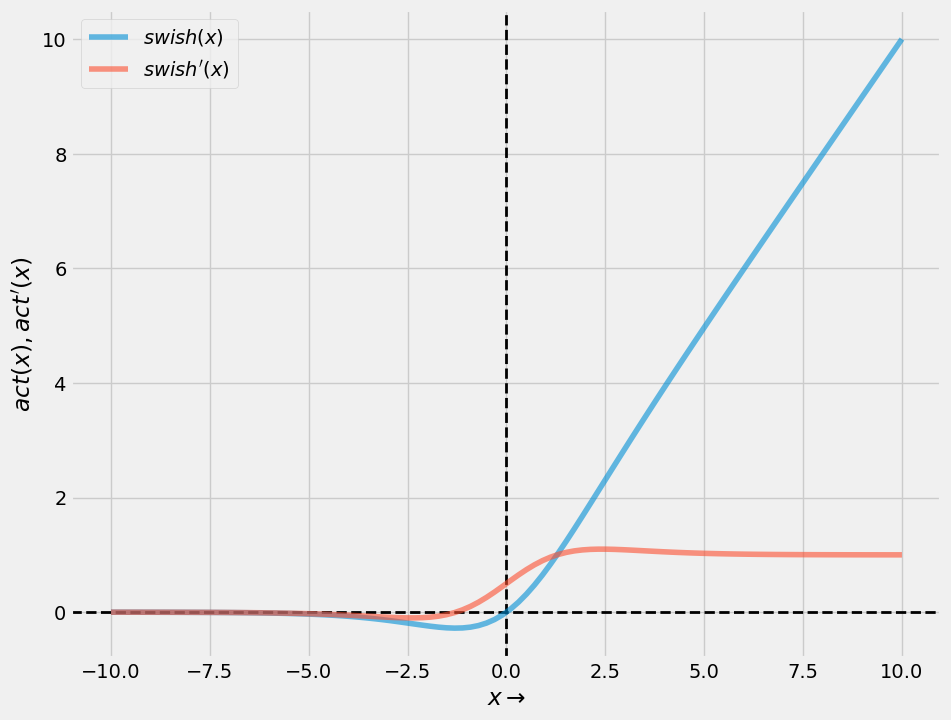

In [27]:
def plot_swish(x, path):
    plot_graph(x, f=swish, title="Swish function", 
            LABEL_Y=r"$swish(x)$", 
            LABEL_Y_DASH=r"$swish^\prime(x)$", 
            filepath_to_plot=path)

plot_swish(x, os.path.join(root_plot_dir, "Swish"))

In [28]:
def swish_beta(z, beta=0.1):
    return z * sigmoid(z * beta)

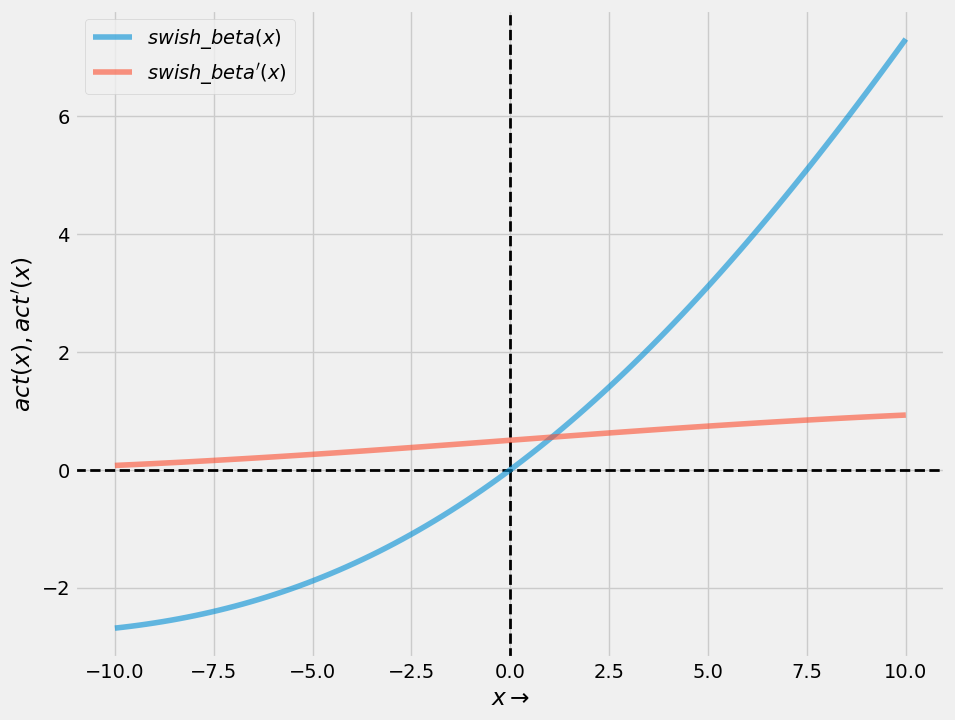

In [29]:
def plot_swish_beta(x, path):
    plot_graph(x, f=swish_beta, title="swish_beta function", 
            LABEL_Y=r"$swish\_beta(x)$", 
            LABEL_Y_DASH=r"$swish\_beta^\prime(x)$",
            filepath_to_plot=path)
plot_swish_beta(x, os.path.join(root_plot_dir, "Swish_beta"))

### Softplus

Softplus is an activation function 

$$f(x) = log(1+e^x)$$

It can be viewed as a smooth version of ReLU.

![](https://paperswithcode.com/media/methods/Screen_Shot_2020-05-27_at_2.07.07_PM.png)

[reference](https://paperswithcode.com/method/softplus)

In [30]:
def softplus(z):
    return tf.keras.activations.softplus(z)

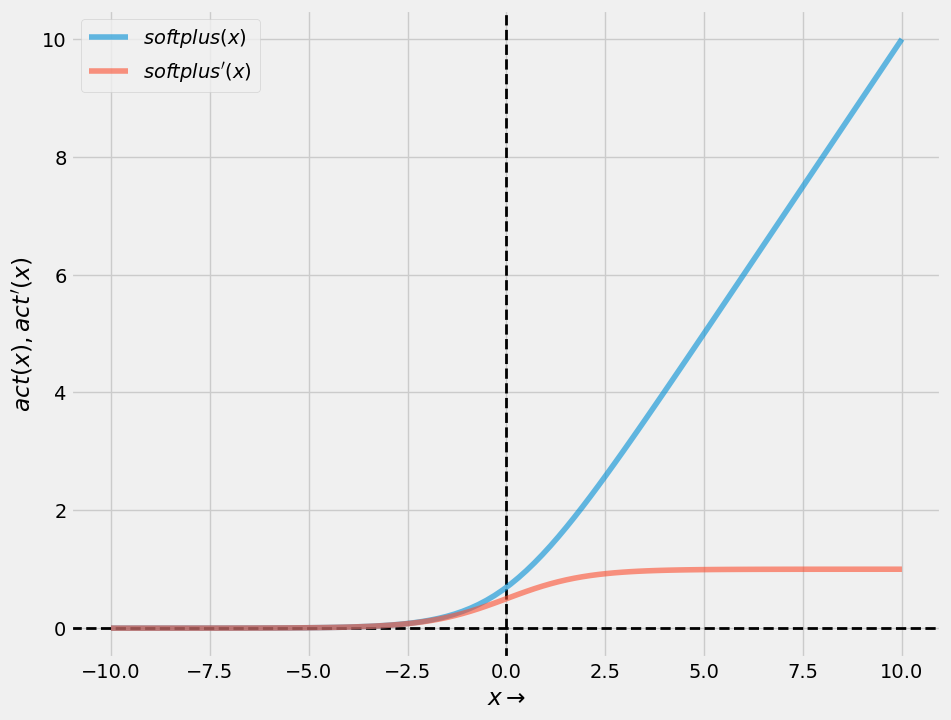

In [31]:

def plot_softplus(x, path):
    plot_graph(x, f=softplus, title="Softplus function", 
            LABEL_Y=r"$softplus(x)$", 
            LABEL_Y_DASH=r"$softplus^\prime(x)$", 
            filepath_to_plot=path)

plot_softplus(x, os.path.join(root_plot_dir, "Softplus"))

$$hard\_sigmoid(x) = 
\left\{\begin{matrix}
0 & x < -2.5\\ 
1 & x > 2.5\\ 
0.2 \times x + 0.5 & -2.5 \leq  x \leq  2.5
\end{matrix}\right.
$$

In [32]:
def hard_sigmoid(z):
    z = tf.constant(z) # Check reference 
    return tf.keras.activations.hard_sigmoid(z)

[reference](https://stackoverflow.com/questions/57555407/numpy-dtype-object-has-no-attribute-base-dtype-in-keras)

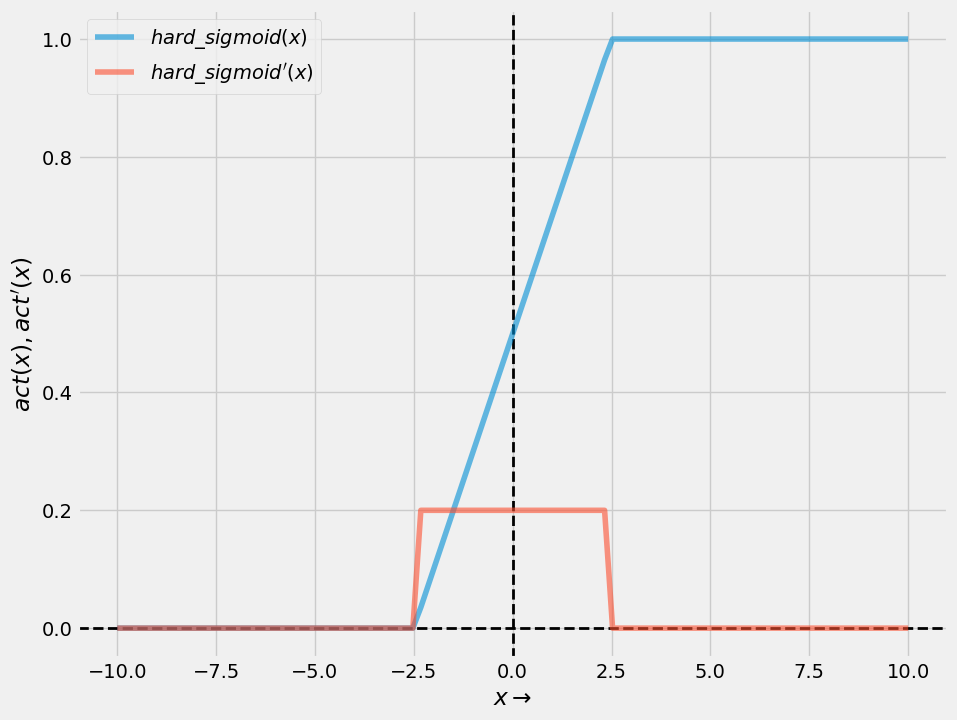

In [33]:
def plot_hard_sigmoid(x, path):
    plot_graph(x, f=hard_sigmoid, title="Hard Sigmoid function", 
            LABEL_Y=r"$hard\_sigmoid(x)$", 
            LABEL_Y_DASH=r"$hard\_sigmoid^\prime(x)$", 
            filepath_to_plot=path)

plot_hard_sigmoid(x, os.path.join(root_plot_dir, "hard sigmoid"))

### Softsign

$$softsign(x) = \frac{x}{(|x| + 1)}$$

In [34]:
def softsign(z):
    return tf.keras.activations.softsign(z)

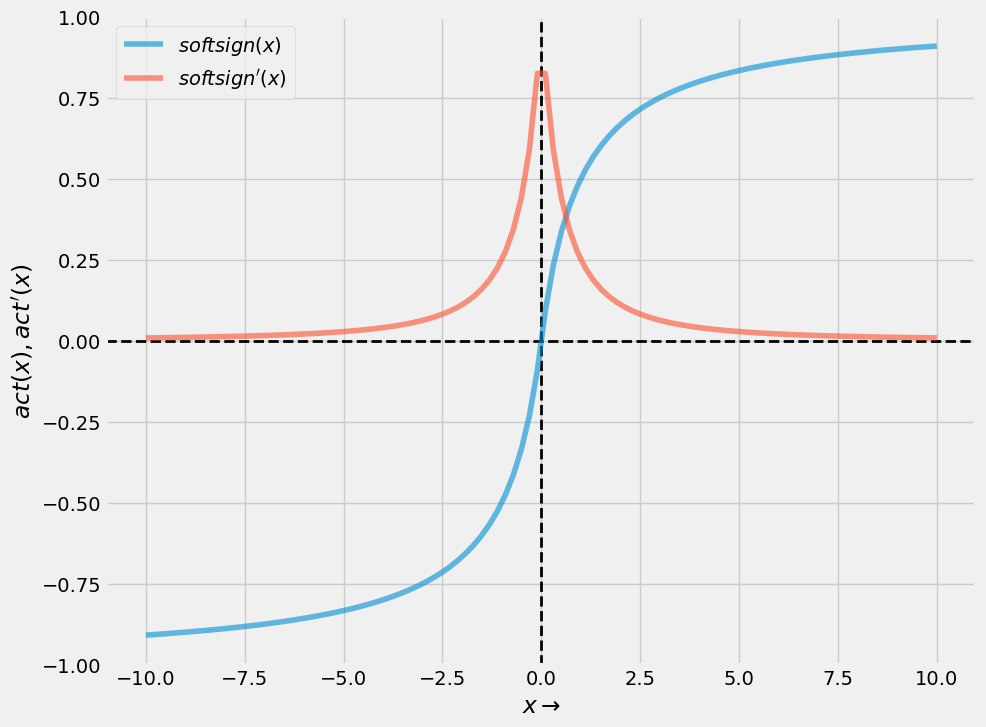

In [35]:

def plot_softsign(x, path):
    plot_graph(x, f=softsign, title="softsign function", 
            LABEL_Y=r"$softsign(x)$", 
            LABEL_Y_DASH=r"$softsign^\prime(x)$", 
            filepath_to_plot=path)

plot_softsign(x, os.path.join(root_plot_dir, "Softsign"))

## **------------------------------------------------------NOTE--------------------------------------------------------------**

#### **Generally speaking, these activation functions have their own advantages and disadvantages. There is no statement that indicates which ones are not working, and which activation functions are good. All the good and bad must be obtained by experiments.**